<img style = "width:100%; height:auto;" src = "https://wallpapersmug.com/download/1920x1080/a8a1e4/coin-money-bitcoin.jpg">
<h1 style = "text-align:center; background-color:black; color:white"> G-Research | <i>BaseLine</i> | DNN, RNN + 1D-CNN  | <i>v1</i> </h1> 

All the given data after parsing & pre-processing are saved then loaded again, as this notebook is aimed at analysing performance of Basic DeepLearning Models | For forecasting only considering BTC  

In [4]:
import pandas as pd

'''

Basically the training_dataset contains ~3.8 years of data points for each asset
During Forecasting I have taken only 1 year worth of recent data (only for BTC)

'''


df_asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv')
print('df_asset_details: ',df_asset_details.shape)
df_sub_sample = pd.read_csv('../input/g-research-crypto-forecasting/example_sample_submission.csv')
print('sub_sample: ',df_sub_sample.shape)
df_sup_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv').iloc[-5000000:]
print('sup_train: ',df_sup_train.shape)
df_train = pd.read_csv('../input/g-research-crypto-forecasting/train.csv').iloc[-5000000:]
print('train_shape: ', df_train.shape)

df_asset_details:  (14, 3)
sub_sample:  (56, 3)
sup_train:  (2518278, 10)
train_shape:  (5000000, 10)


In [5]:
print('Train_set_time_entry_range: ',df_train['timestamp'].iloc[0], ' - ', df_train['timestamp'].iloc[-1])
print()
print('Supplemetary_train_set_time_entry_range: ', df_sup_train['timestamp'].iloc[0], ' - ', df_sup_train['timestamp'].iloc[-1])

Train_set_time_entry_range:  1610748960  -  1632182400

Supplemetary_train_set_time_entry_range:  1632182460  -  1642982400


In [6]:
df_temp = pd.concat([df_train, df_sup_train], axis = 0 )
print('df_temp_before: ', df_temp.shape)
df_temp = df_temp.drop_duplicates()
print('df_temp_after: ', df_temp.shape)

df_temp_before:  (7518278, 10)
df_temp_after:  (7518278, 10)


In [7]:
df_temp.sort_values('timestamp')
print('Train/Sup_set_time_entry_range: ',df_temp['timestamp'].iloc[0], ' - ', df_temp['timestamp'].iloc[-1])
print()
print(df_temp['timestamp'].value_counts())

Train/Sup_set_time_entry_range:  1610748960  -  1642982400

1626865680    14
1632188040    14
1632187920    14
1632187860    14
1632187800    14
              ..
1634109900     7
1620925740     7
1612782780     6
1620925680     2
1620925620     2
Name: timestamp, Length: 537213, dtype: int64


### Visualizaton (~ Raw)

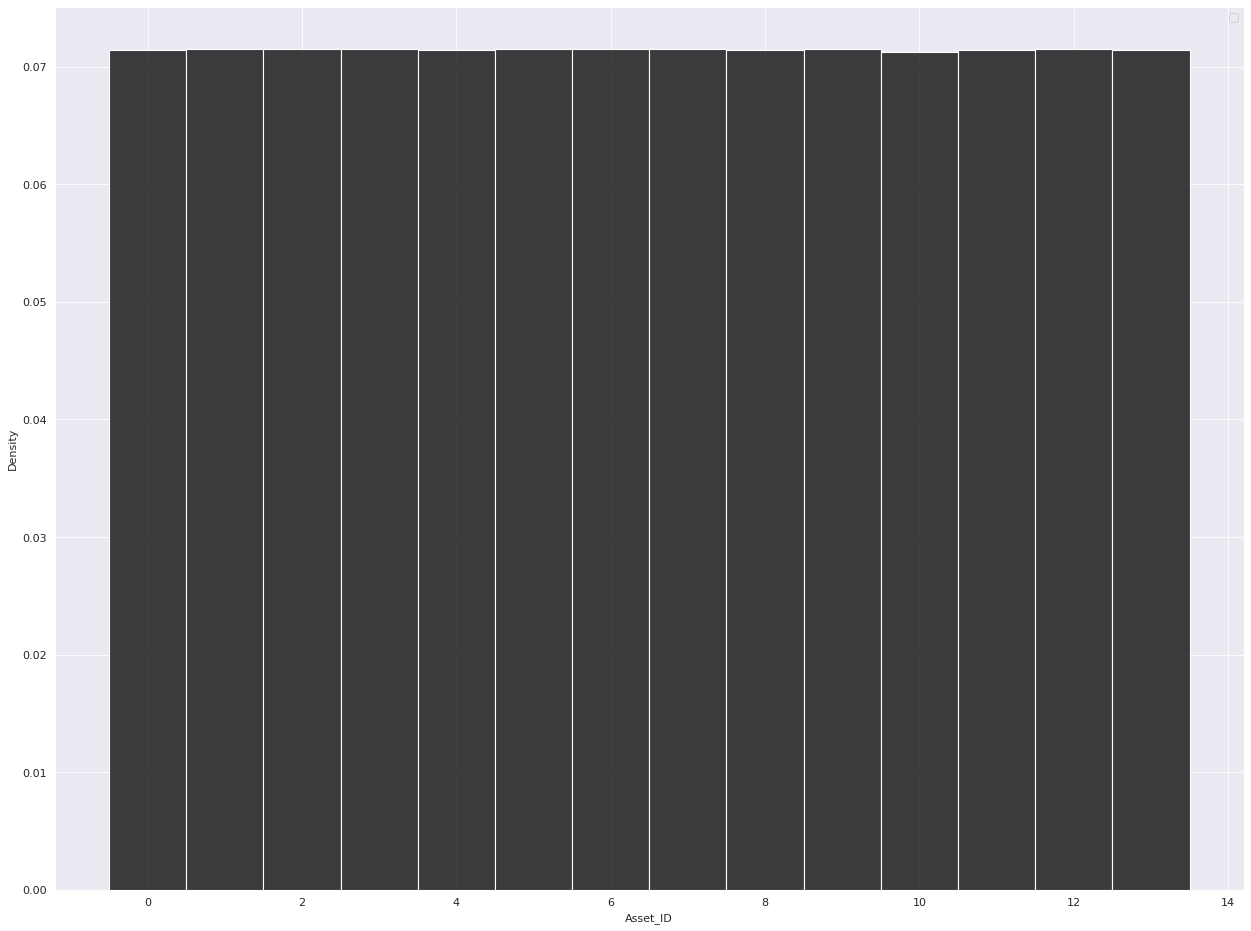

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

fig, axs = plt.subplots(1,1, figsize=(16,12), dpi = 80)

sns.histplot(data = df_temp.Asset_ID, color='black', discrete=True, ax = axs, stat = 'density', kde=False)
plt.legend()

plt.tight_layout(pad=2)
plt.show()

In [ ]:
'''
timestamp - A timestamp for the minute covered by the row.
Asset_ID - An ID code for the cryptoasset.
Count - The number of trades that took place this minute.
Open - The USD price at the beginning of the minute.
High - The highest USD price during the minute.
Low - The lowest USD price during the minute.
Close - The USD price at the end of the minute.
Volume - The number of cryptoasset units traded during the minute.
VWAP - The volume weighted average price for the minute.
Target - Residual log-return over 15 minute time-data. See the 'Prediction and Evaluation' section of this notebook for details of how the target is calculated.
'''
print('Done!')

In [9]:
from IPython.display import display
print('Asset_Details: ')
print()
display(df_asset_details.head())
print('Sample_Submission: ')
print()
display(df_sub_sample.head())
print('Supplementary_train_samples: ')
print()
display(df_sup_train.head())
print('Train_samples: ')
print()
display(df_train.head())
print('--'*20)
asset_info = df_sup_train.groupby('Asset_ID')['timestamp'].agg('count')
print(asset_info)
print('--'*20)
print(df_train.info())
print('--'*20)
print(df_train.isnull().sum())

Asset_Details: 



,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


Sample_Submission: 



,group_num,row_id,Target
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


Supplementary_train_samples: 



,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1632182460,3,561.0,2.079028,2.080605,2.0720,2.076458,2.804627e+05,2.075869,0.003085
1,1632182460,2,169.0,541.006000,541.200000,539.7000,540.722000,1.889432e+02,540.716930,-0.000607
2,1632182460,0,400.0,363.737500,363.900000,363.0000,363.654000,8.792685e+02,363.499554,-0.019375
3,1632182460,1,1933.0,42986.143333,43001.000000,42898.0000,42947.065566,9.183861e+01,42942.976718,-0.000374
4,1632182460,4,348.0,0.208326,0.208400,0.2078,0.208200,1.051337e+06,0.208077,-0.001233


Train_samples: 



,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
19236806,1610748960,1,957.0,36206.861429,36229.650000,36190.190000,36208.728571,41.432349,36209.592593,0.007300
19236807,1610748960,4,15.0,0.009227,0.009232,0.009224,0.009227,264654.400000,0.009226,0.002385
19236808,1610748960,5,39.0,2.739900,2.741000,2.738100,2.739900,3317.888300,2.739485,0.001216
19236809,1610748960,7,24.0,7.858000,8.914000,7.501500,7.857725,343.278613,7.857301,-0.029021
19236810,1610748960,6,681.0,1158.635714,1159.380000,1158.160000,1158.727143,614.321638,1158.714733,0.002908


----------------------------------------
Asset_ID
0     179860
1     179996
2     179981
3     179990
4     179966
5     179994
6     179996
7     179991
8     179849
9     179995
10    178882
11    179852
12    179992
13    179934
Name: timestamp, dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 19236806 to 24236805
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 381.5 MB
None
----------------------------------------
timestamp       0
Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target       2030
dtype: int

In [10]:
import gc
del df_train
gc.collect()
df_train = df_temp[:]
asset_info = df_train.groupby('Asset_ID')['timestamp']
print(asset_info.agg('value_counts'))
asset_info_time = asset_info.agg('unique')


Asset_ID  timestamp 
0         1610749020    1
          1610749080    1
          1610749140    1
          1610749200    1
          1610749260    1
                       ..
13        1642982160    1
          1642982220    1
          1642982280    1
          1642982340    1
          1642982400    1
Name: timestamp, Length: 7518278, dtype: int64


In [11]:
from pprint import pprint
inv_asset_dict = { key:value for key, value in zip(df_asset_details['Asset_ID'],df_asset_details['Asset_Name'])}
pprint(inv_asset_dict)

asset_name = list(inv_asset_dict)
print('num_assets: ', len(asset_name))


{0: 'Binance Coin',
 1: 'Bitcoin',
 2: 'Bitcoin Cash',
 3: 'Cardano',
 4: 'Dogecoin',
 5: 'EOS.IO',
 6: 'Ethereum',
 7: 'Ethereum Classic',
 8: 'IOTA',
 9: 'Litecoin',
 10: 'Maker',
 11: 'Monero',
 12: 'Stellar',
 13: 'TRON'}
num_assets:  14


In [12]:
asset_info_open = df_train.groupby('Asset_ID')['Open']
asset_info_open = asset_info_open.agg(lambda x: list(x)) ## using anonymous function to form a list of all gropued 
asset_info_close = df_train.groupby('Asset_ID')['Close']
asset_info_close = asset_info_close.agg(lambda x: list(x)) ## using anonymous function to form a list of all gropued 
asset_info_high = df_train.groupby('Asset_ID')['High']
asset_info_high = asset_info_high.agg(lambda x: list(x)) ## using anonymous function to form a list of all gropued 
asset_info_low = df_train.groupby('Asset_ID')['Low']
asset_info_low = asset_info_low.agg(lambda x: list(x)) ## using anonymous function to form a list of all gropued 

## Asset_IDs
print(asset_info_open.head())
print()
print(asset_info_close.head())
print()
print(asset_info_high.head())
print()
print(asset_info_low.head())


Asset_ID
0    [40.7198, 40.69715, 40.69225, 40.6946, 40.7067...
1    [36206.86142857142, 36205.92571428572, 36177.4...
2    [481.258, 481.192, 481.185, 481.38, 481.0325, ...
3    [0.3009895, 0.30104075, 0.30063, 0.3010422, 0....
4    [0.00922725, 0.0092243, 0.0092218999999999, 0....
Name: Open, dtype: object

Asset_ID
0    [40.7267, 40.69165, 40.7043, 40.7073, 40.687, ...
1    [36208.728571428575, 36177.96428571428, 36145....
2    [481.082, 481.17800000000005, 481.355, 481.333...
3    [0.3009795, 0.3008315, 0.3009415, 0.3009454, 0...
4    [0.0092267999999999, 0.0092223, 0.00922275, 0....
Name: Close, dtype: object

Asset_ID
0    [40.743, 40.7096, 40.7097, 40.7195, 40.7099, 4...
1    [36229.65, 36218.16, 36200.0, 36186.86, 36204....
2    [482.15, 482.12, 482.16, 482.51, 481.77, 481.0...
3    [0.301224, 0.301233, 0.301207, 0.301311, 0.300...
4    [0.0092317, 0.0092256, 0.0092397, 0.009239, 0....
Name: High, dtype: object

Asset_ID
0    [40.6908, 40.6757, 40.6721, 40.6946, 40.6867, ...
1 

**************************************** 1000 mins | 16.66 hrs data_represented ****************************************

Done!


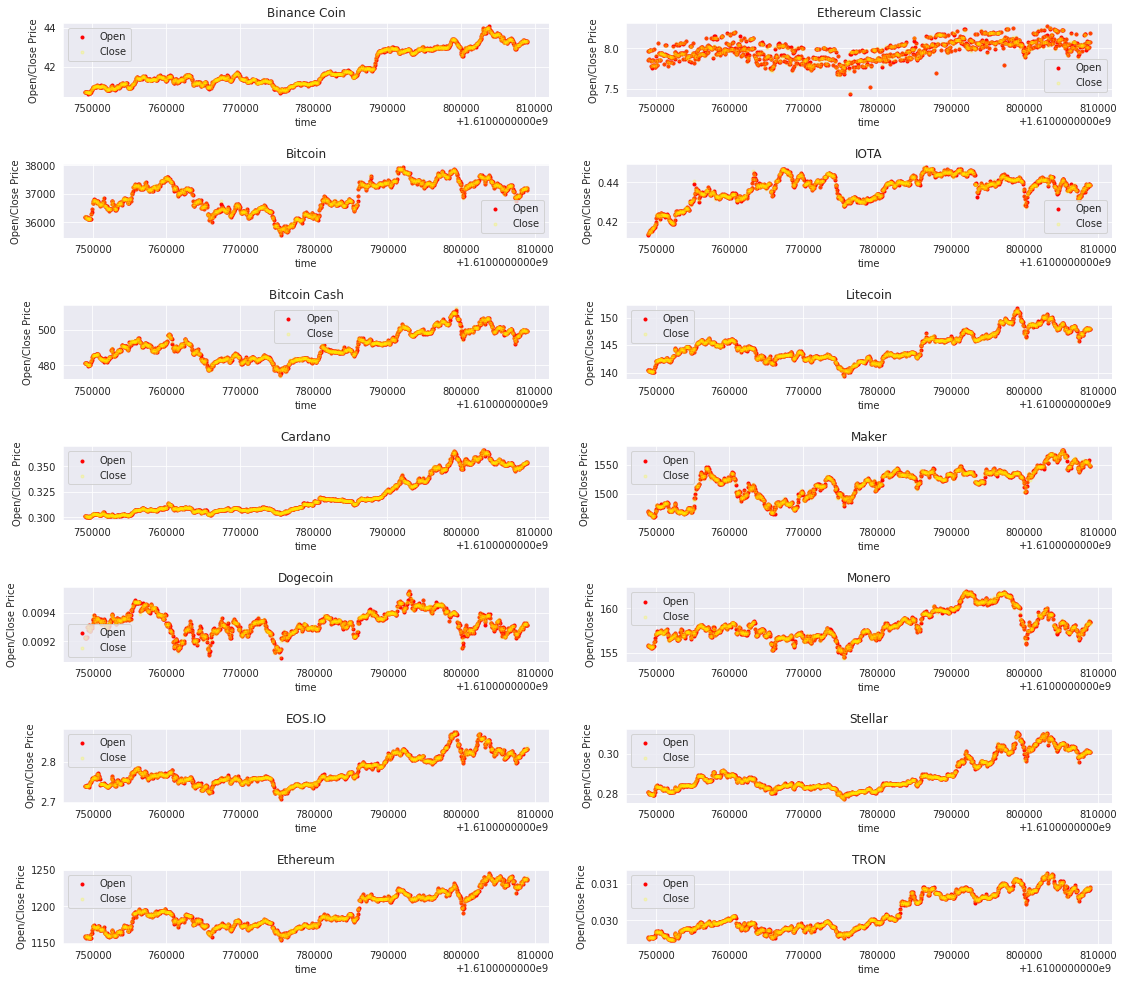

In [13]:
#'''## EDA
import seaborn as sns
import matplotlib.pyplot as plt

print('**'*20,'1000 mins | 16.66 hrs data_represented', '**'*20)
print()
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2, figsize=(16,14))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].scatter(asset_info_time[step][:1000],asset_info_open[step][:1000], color='red', marker='.', label = 'Open')
        axs[j,i].scatter(asset_info_time[step][:1000],asset_info_close[step][:1000], color = 'yellow', alpha = 0.2, marker='.', label='Close')
        axs[j,i].legend()
        axs[j,i].set_xlabel('time')
        axs[j,i].set_ylabel('Open/Close Price')
        step+=1

plt.tight_layout(pad=2)
#'''
print('Done!')

**************************************** 1000 mins | 16.66 hrs data_represented ****************************************

Done!


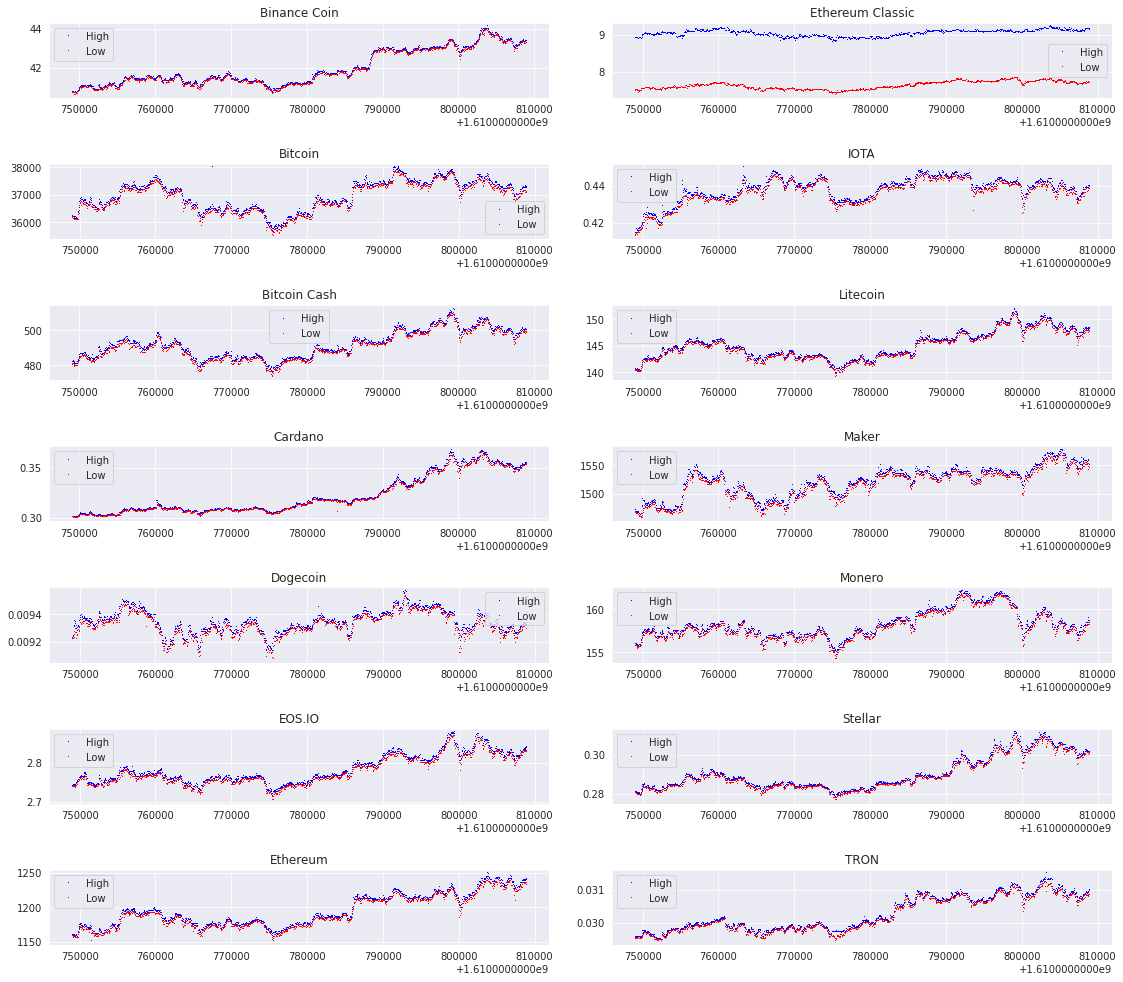

In [14]:
#'''
print('**'*20,'1000 mins | 16.66 hrs data_represented', '**'*20)
print()
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2, figsize=(16,14))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].plot(asset_info_time[step][:1000],asset_info_high[step][:1000], ',b' ,label = 'High')
        axs[j,i].plot(asset_info_time[step][:1000],asset_info_low[step][:1000], ',r',label='Low')
        axs[j,i].legend()
        step+=1
plt.tight_layout(pad=2)#'''

print('Done!')

In [15]:
asset_info_count = df_train.groupby('Asset_ID')['Count']
asset_info_count = asset_info_count.agg(lambda x: list(x))
asset_info_vol = df_train.groupby('Asset_ID')['Volume']
asset_info_vol = asset_info_vol.agg(lambda x: list(x)) 

print(asset_info_count.head())
print()
print(asset_info_vol.head())

Asset_ID
0    [50.0, 45.0, 52.0, 43.0, 62.0, 87.0, 60.0, 120...
1    [957.0, 1339.0, 1236.0, 1198.0, 1099.0, 1432.0...
2    [190.0, 49.0, 71.0, 85.0, 62.0, 96.0, 86.0, 72...
3    [79.0, 98.0, 99.0, 69.0, 97.0, 60.0, 95.0, 142...
4    [15.0, 6.0, 23.0, 23.0, 218.0, 427.0, 197.0, 1...
Name: Count, dtype: object

Asset_ID
0    [228.0254, 227.82440000000005, 697.07040000000...
1    [41.432348918860185, 59.71406487742809, 43.223...
2    [176.3367271999998, 42.49424943999999, 280.394...
3    [109192.56513380812, 131425.75436225743, 12936...
4    [264654.4, 156968.2, 388176.82, 448779.9, 1415...
Name: Volume, dtype: object



**************************************** || Trades/Transactions per minute || ****************************************



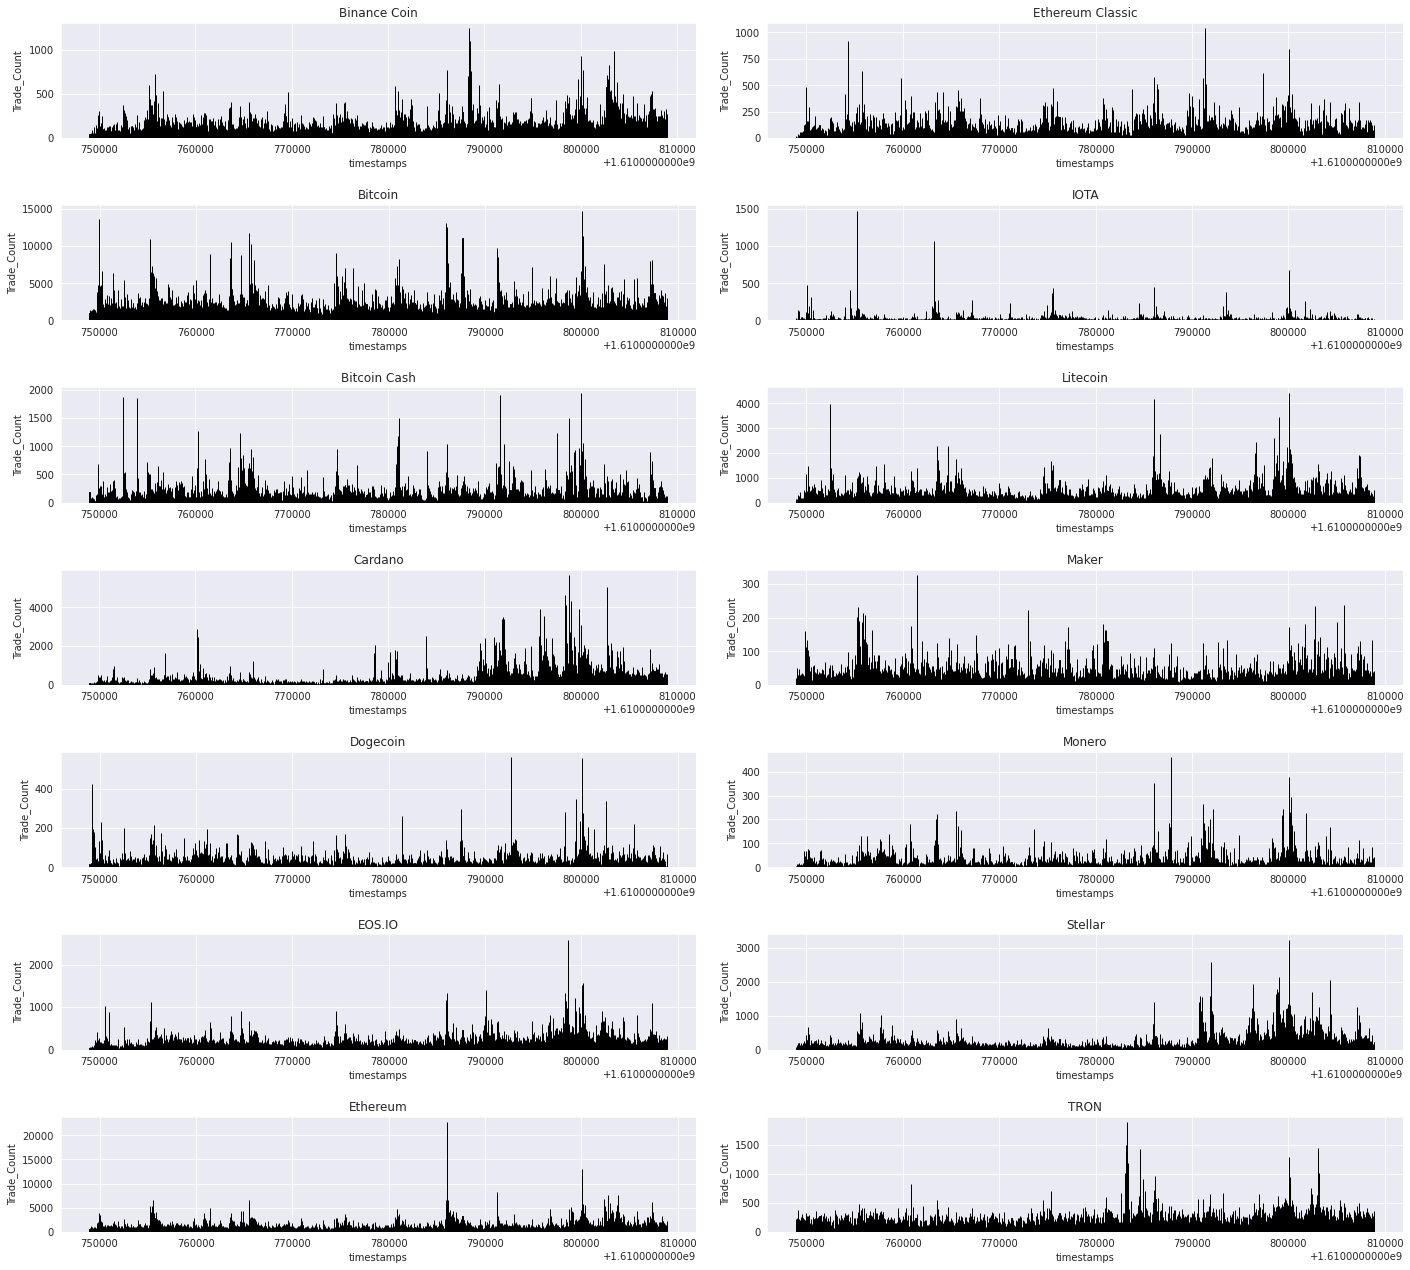


**************************************** || Volume per minute || ****************************************



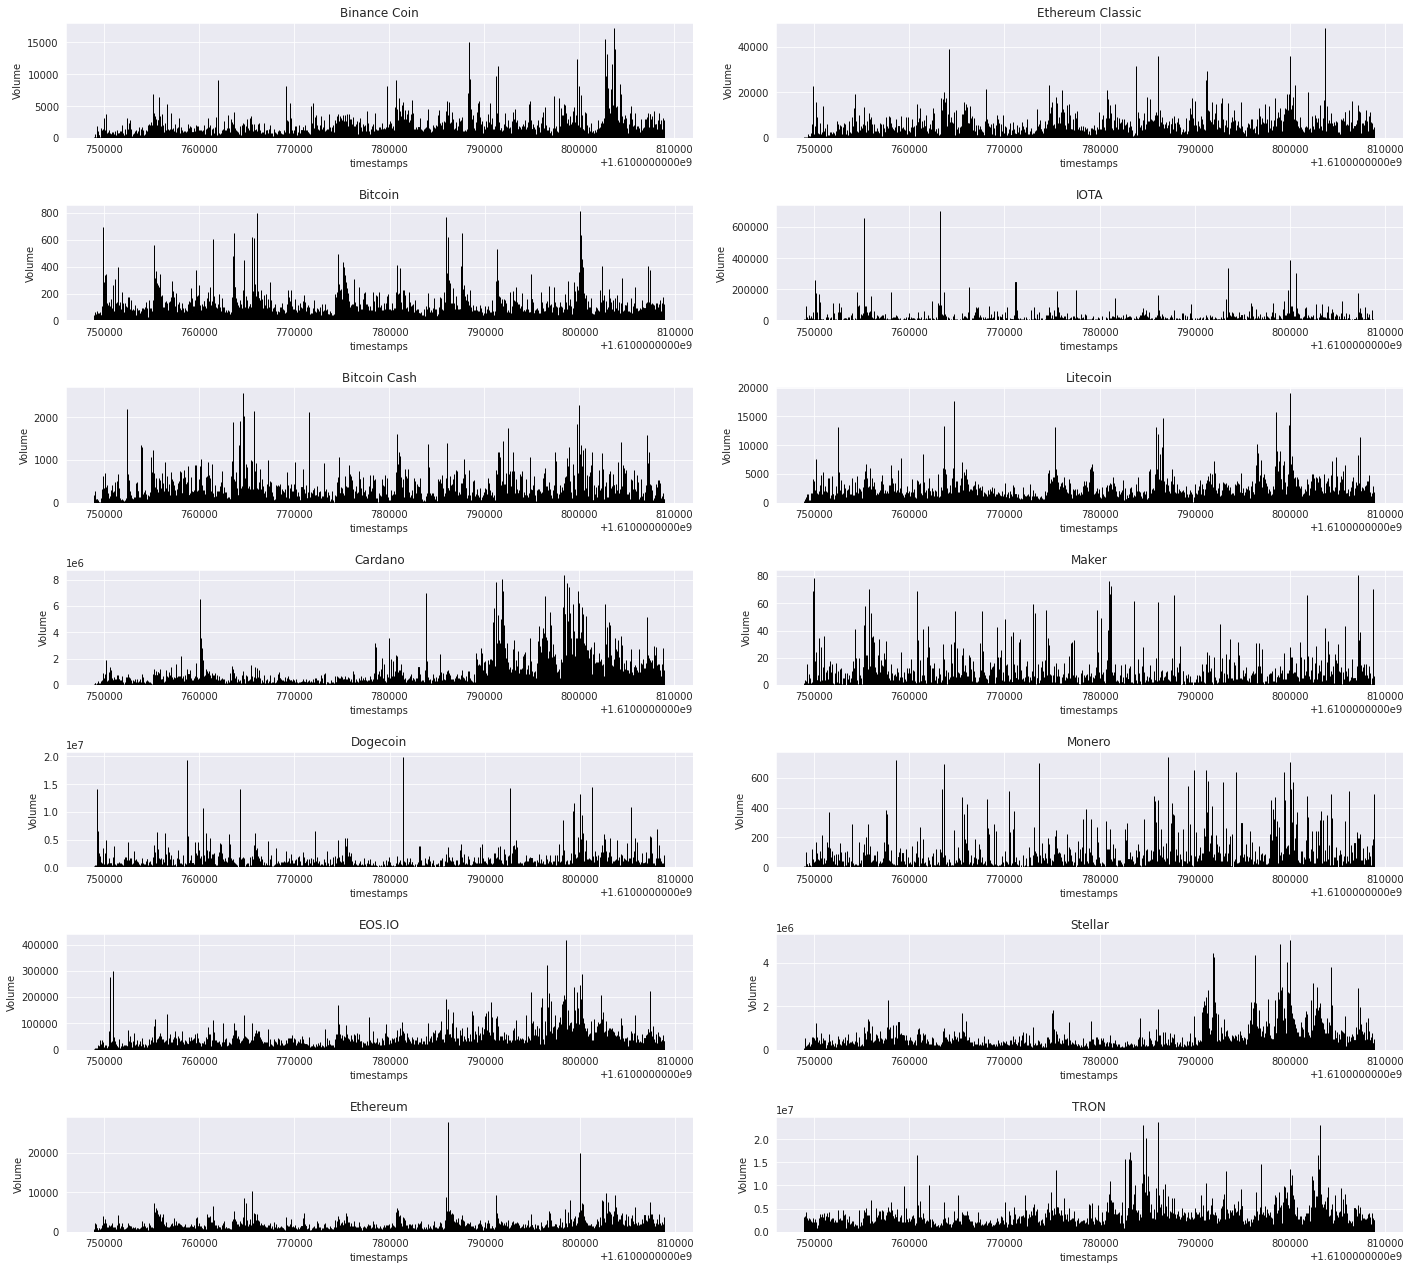

Done!


In [16]:
#'''
print()
print('**'*20,'|| Trades/Transactions per minute ||', '**'*20)
print()
sns.set_style('darkgrid')
fig, axs = plt.subplots(7,2, figsize=(20,18))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].bar(asset_info_time[step][:1000],asset_info_count[step][:1000], edgecolor = 'black')
        axs[j,i].set_xlabel('timestamps')
        axs[j,i].set_ylabel('Trade_Count')
        step+=1
plt.tight_layout(pad=2)
plt.show()
print()
print('**'*20,'|| Volume per minute ||', '**'*20)
print()
fig, axs = plt.subplots(7,2, figsize=(20,18))
step = 0
for i in range(2):
    for j in range(7):
        axs[j,i].set_title(inv_asset_dict.get(step))
        axs[j,i].bar(asset_info_time[step][:1000],asset_info_vol[step][:1000], edgecolor = 'black')
        axs[j,i].set_xlabel('timestamps')
        axs[j,i].set_ylabel('Volume')
        step+=1
plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [17]:
asset_info_targ = df_train.groupby('Asset_ID')['Target']
asset_info_targ = asset_info_targ.agg(lambda x: list(x)) 

print(asset_info_targ.head())
asset_dict = {value:key for key, value in inv_asset_dict.items()}

Asset_ID
0    [-0.0008766999384754, -0.0003337140658116, 0.0...
1    [0.0072999870741355, 0.0063482269853082, 0.006...
2    [-0.0029988299642558, -0.0024004426720939, -0....
3    [-0.0046735298013822, -0.0042993575053068, -0....
4    [0.0023845177443263, 0.0011348618446494, 0.002...
Name: Target, dtype: object



**************************************** || Residualised Return per minute || ****************************************



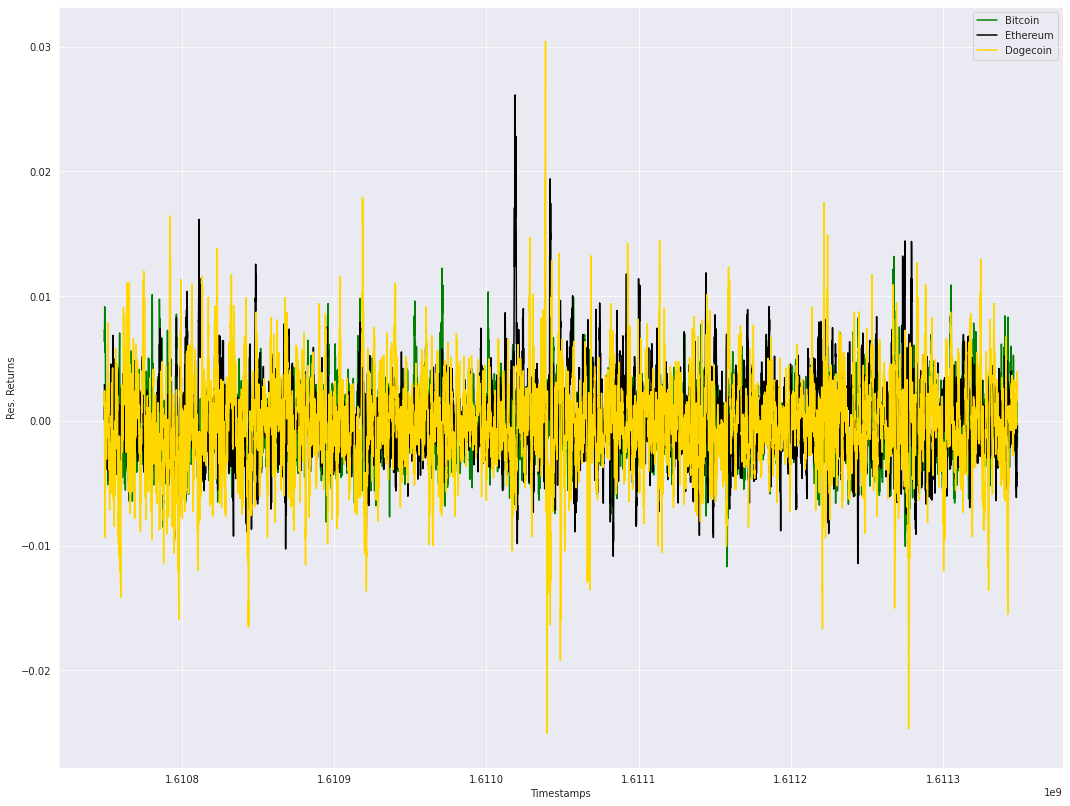

Done!


In [18]:
#'''
import random
print()
print('**'*20,'|| Residualised Return per minute ||', '**'*20)
print()

colors = ['cyan','green','red','blue','gold','red','black','orange','magenta','deeppink','lime','slategray','yellow','darkviolet'] ## all possible colors 
name_plot = ['Bitcoin', 'Ethereum', 'Dogecoin']


fig, axs = plt.subplots(1,1, figsize=(18,14))
#axs[0].set_title(inv_asset_dict.get(step))
for name in name_plot:
    #step = random.randint(0,len(list(asset_dict))-1) ## random_sample 3 coins
    step = asset_dict.get(name)
    axs.plot(asset_info_time[step][:10000],asset_info_targ[step][:10000], c=colors[step], label=inv_asset_dict.get(step))
axs.set_xlabel('Timestamps')
axs.set_ylabel('Res. Returns')
axs.legend()
#plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [19]:
print(df_temp.info())
print('**'*40)
print(df_temp.isnull().sum())
print('**'*40)
df_temp_2 = df_temp.fillna(method = 'ffill')
print(df_temp_2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7518278 entries, 19236806 to 2518277
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
dtypes: float64(8), int64(2)
memory usage: 631.0 MB
None
********************************************************************************
timestamp       0
Asset_ID        0
Count           0
Open            0
High            0
Low             0
Close           0
Volume          0
VWAP            0
Target       4953
dtype: int64
********************************************************************************
timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64


### Better-Visualization (~preprocessed)

In [20]:
import numpy as np
import gc

df_sep_dict = {}

print('df_temp_2_shape : ', df_temp_2.shape)

for key in list(asset_dict):
    asset_dict = {value:key for key, value in inv_asset_dict.items()}
    mid = asset_dict[key]
    df_mid = df_temp_2[df_temp_2['Asset_ID'] == mid] 
    df_mid.index = df_mid.timestamp
    df_mid = df_mid.drop('timestamp', axis = 1)
    print(key+' _before : ')
    print((df_mid.index[1:] - df_mid.index[:-1]).value_counts().head())
    df_mid = df_mid.reindex(range(df_mid.index[0], df_mid.index[-1]+60, 60), method = 'pad') ## gap filling in the continumm to a constant value
    print()
    print(key+' _after : ')
    print((df_mid.index[1:] - df_mid.index[:-1]).value_counts().head())
    df_sep_dict[key] = df_mid
    print('**'*20)


del df_train
del df_temp    
del df_temp_2
gc.collect()


df_temp_2_shape :  (7518278, 10)
Bitcoin Cash _before : 
60     537168
120        18
240         2
180         2
300         1
Name: timestamp, dtype: int64

Bitcoin Cash _after : 
60    537223
Name: timestamp, dtype: int64
****************************************
Binance Coin _before : 
60     536883
120        37
240         5
180         4
300         1
Name: timestamp, dtype: int64

Binance Coin _after : 
60    537223
Name: timestamp, dtype: int64
****************************************
Bitcoin _before : 
60     537198
120        13
Name: timestamp, dtype: int64

Bitcoin _after : 
60    537224
Name: timestamp, dtype: int64
****************************************
EOS.IO _before : 
60     537193
120        14
180         1
Name: timestamp, dtype: int64

EOS.IO _after : 
60    537224
Name: timestamp, dtype: int64
****************************************
Ethereum Classic _before : 
60     537184
120        18
240         1
Name: timestamp, dtype: int64

Ethereum Classic _after : 
60 

848583

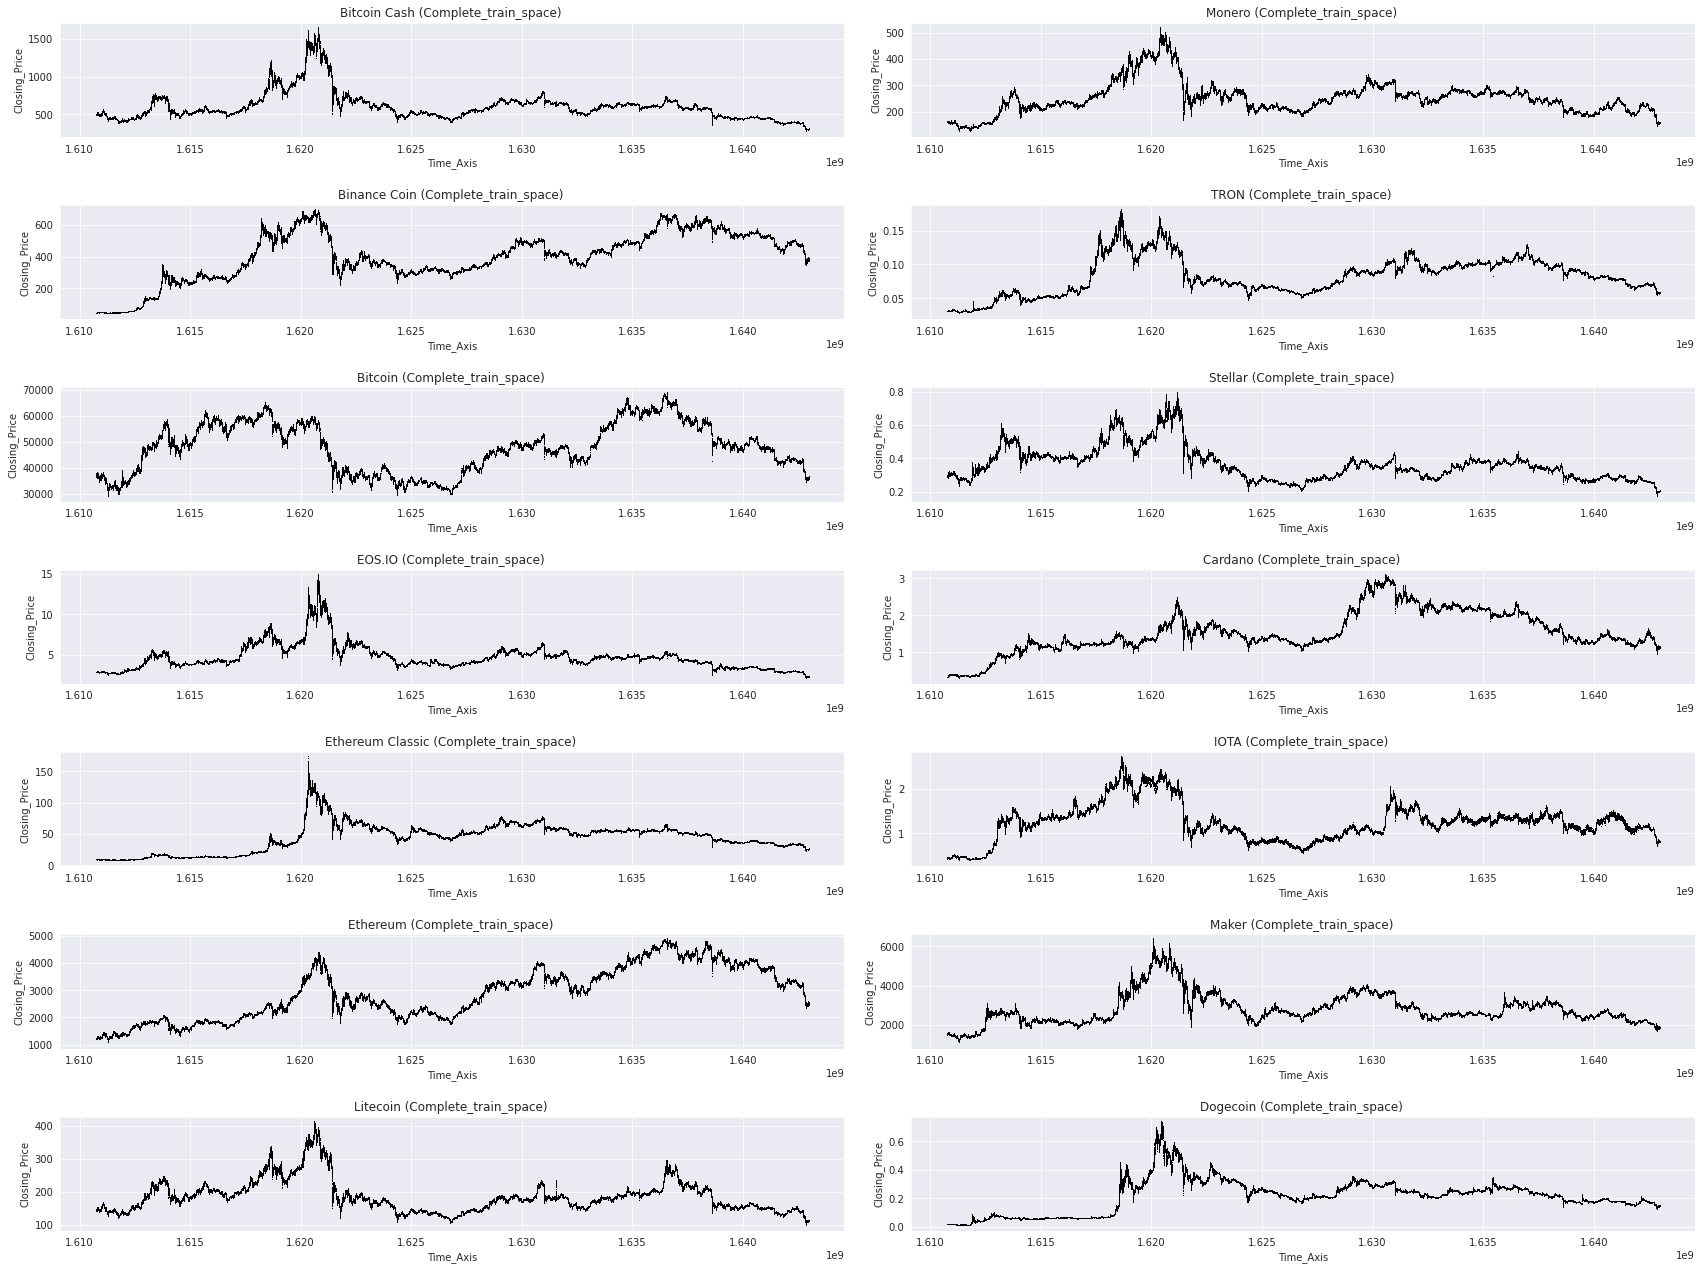


**************************************** VWAP_plot (on_complete_trian_space) ****************************************



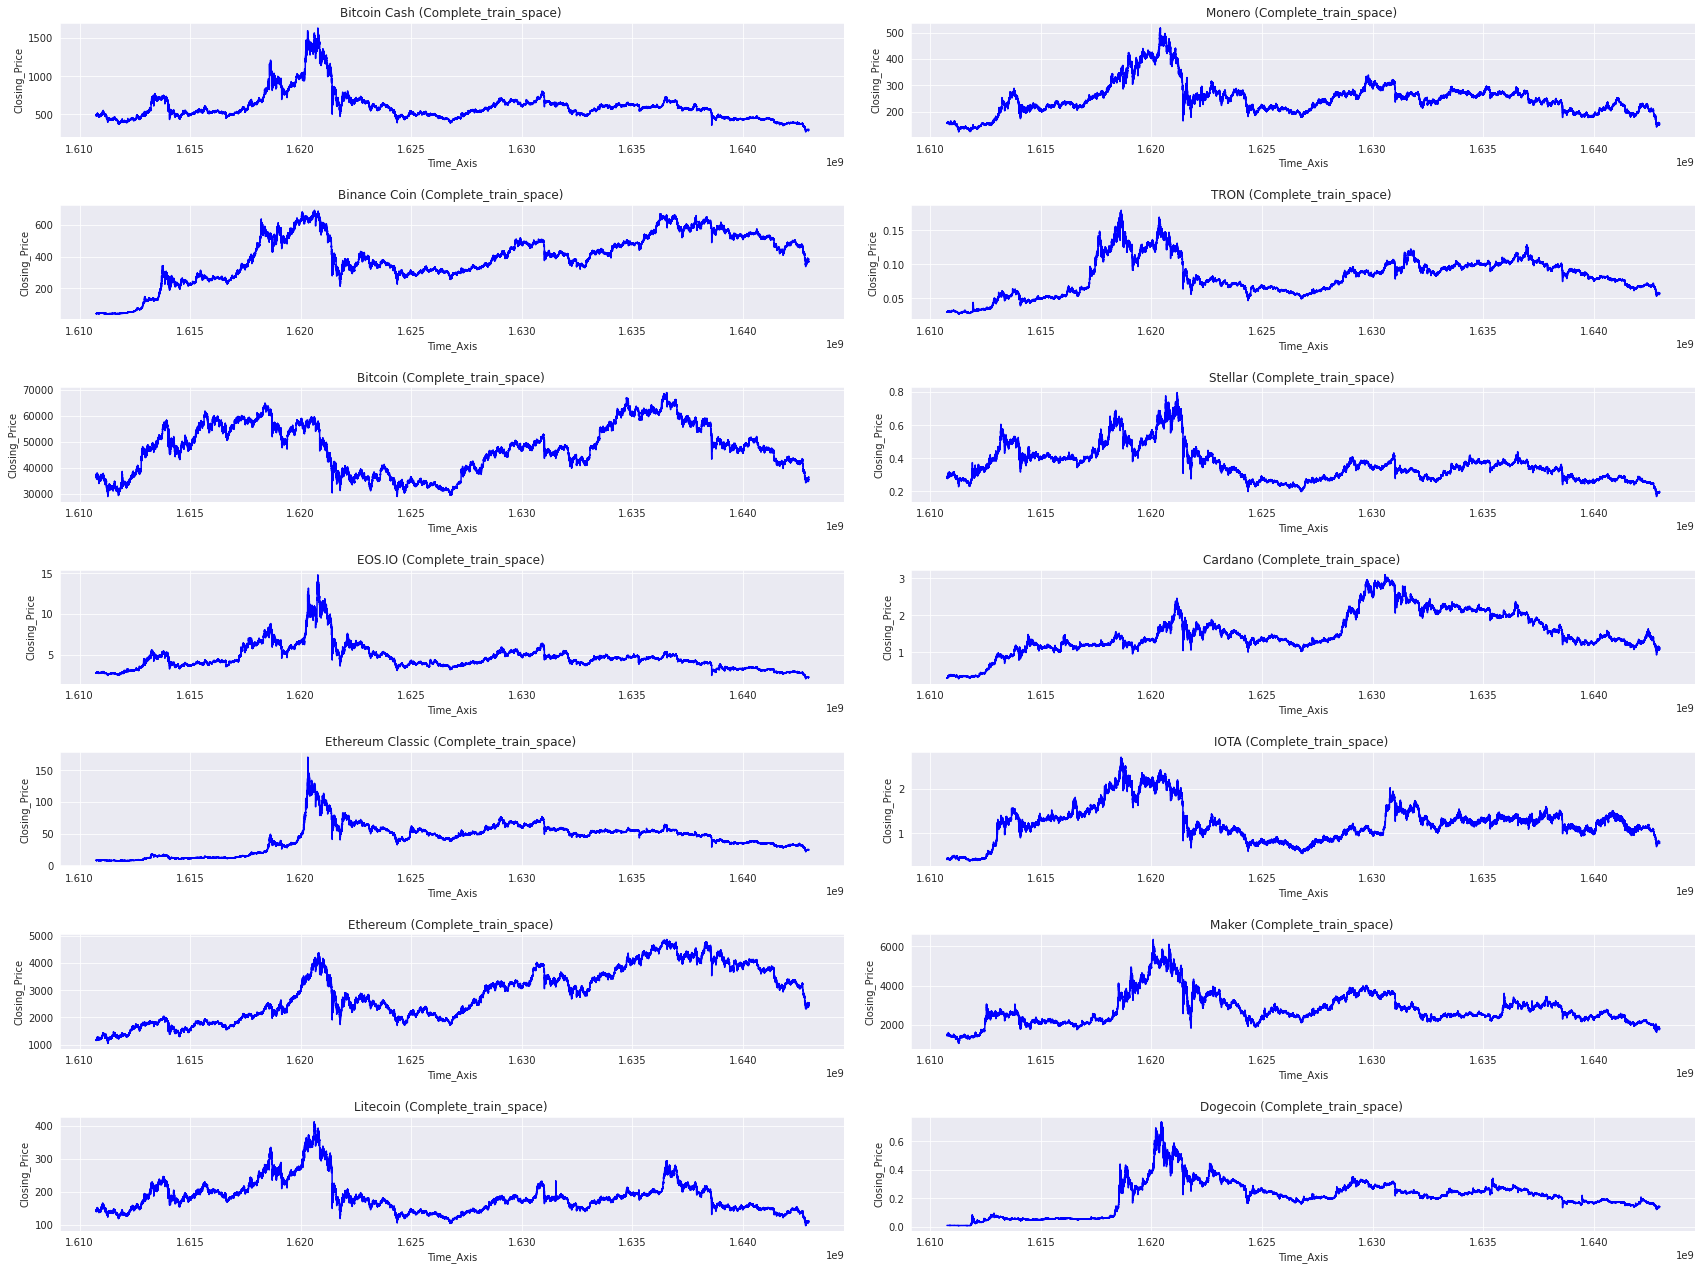

Done!


In [21]:
#'''
fig, axs = plt.subplots(7,2, figsize=(24,18))

req_name = ['Bitcoin', 'Ethereum','Dogecoin']
for step, i in enumerate(df_asset_details['Asset_Name'].tolist()):
    if step < 7:
        axs[step,0].plot(df_sep_dict[i].index, df_sep_dict[i].Close, ',k')
        axs[step,0].set_title(i + ' (Complete_train_space) ')
        axs[step,0].set_xlabel('Time_Axis')
        axs[step,0].set_ylabel('Closing_Price')
    else:
        axs[step-7,1].plot(df_sep_dict[i].index, df_sep_dict[i].Close, ',k')
        axs[step-7,1].set_title(i + ' (Complete_train_space) ')
        axs[step-7,1].set_xlabel('Time_Axis')
        axs[step-7,1].set_ylabel('Closing_Price')

plt.tight_layout(pad=2)
plt.show()

print()
print('**'*20, 'VWAP_plot (on_complete_trian_space)', "**"*20)
print()

fig, axs = plt.subplots(7,2, figsize=(24,18))

req_name = ['Bitcoin', 'Ethereum','Dogecoin']
for step, i in enumerate(df_asset_details['Asset_Name'].tolist()):
    if step < 7:
        axs[step,0].plot(df_sep_dict[i].index, df_sep_dict[i].VWAP, 'b')
        axs[step,0].set_title(i + ' (Complete_train_space) ')
        axs[step,0].set_xlabel('Time_Axis')
        axs[step,0].set_ylabel('Closing_Price')
    else:
        axs[step-7,1].plot(df_sep_dict[i].index, df_sep_dict[i].VWAP, 'b')
        axs[step-7,1].set_title(i + ' (Complete_train_space) ')
        axs[step-7,1].set_xlabel('Time_Axis')
        axs[step-7,1].set_ylabel('Closing_Price')

plt.tight_layout(pad=2)
plt.show()
#'''
print('Done!')

In [ ]:
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')

tpu  = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strat = tf.distribute.TPUStrategy(tpu)

print("Number of accelerators: ", tpu_strat.num_replicas_in_sync)

In [22]:
import pickle

''' Dumping the Data '''
# dict_file = open('BTC_dict_data(last_btc_520k).pkl', 'wb')
# pickle.dump(df_sep_dict['Bitcoin'], dict_file)
# dict_file.close()

dict_file = open('../input/520k-btc-only/BTC_dict_data(last_btc_520k).pkl', 'rb')
df_btc = pickle.load(dict_file)
dict_file.close()

In [23]:
import pandas as pd

df_btc.index = pd.date_range('2020-12-28', periods = len(df_btc), freq='min') # use freq = 'min' to get minute data

<AxesSubplot:>

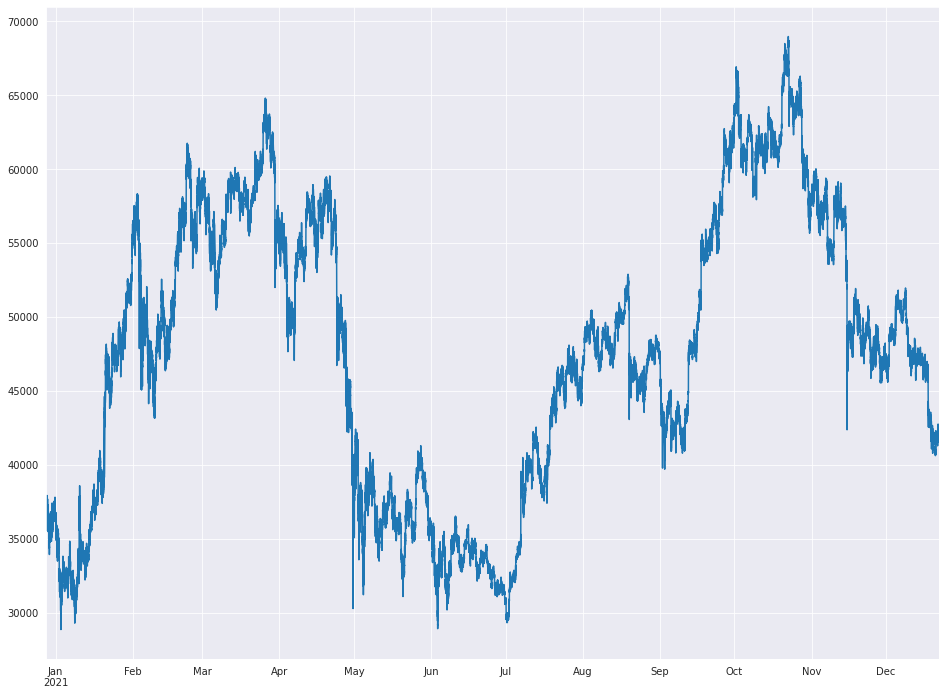

In [24]:
df_btc.Close.plot(figsize=(16,12)) ## They daily update the data to recent one | last year data

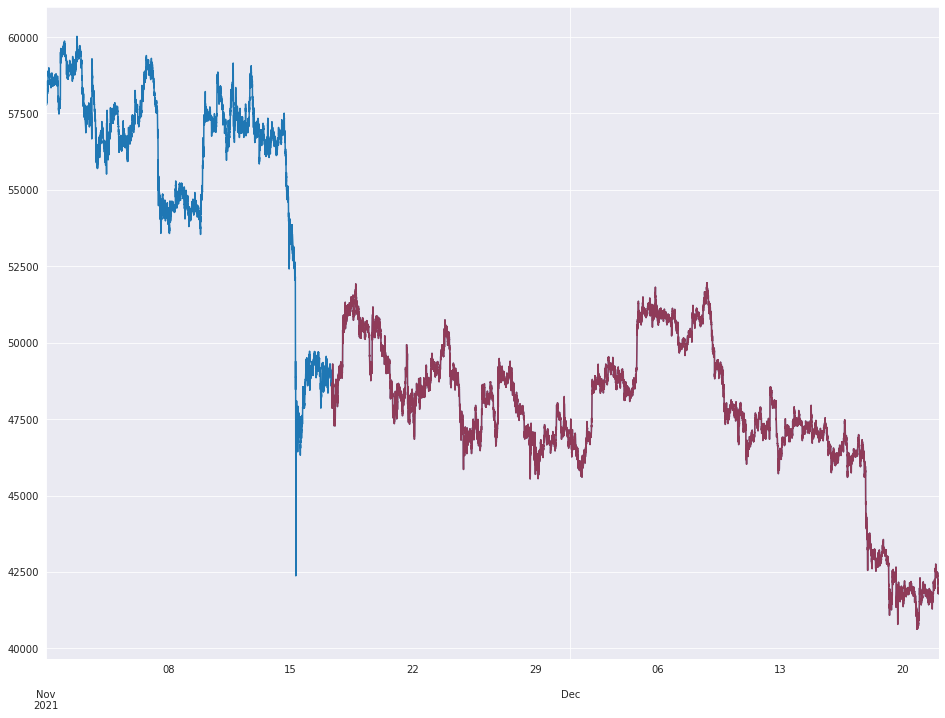

In [25]:
import matplotlib.pyplot as plt
df_btc.loc['2021-11-1':].Close.plot(figsize=(16,12)) #localising recent past 
df_btc.iloc[-50000:].Close.plot(figsize=(16,12), c='r', alpha=0.5)
plt.show()

In [26]:
new_col_order = ['Count','Open','High','Low','Volume','VWAP','Target','Close']


display(df_btc.head())
df_btc = df_btc.reindex(columns = new_col_order)
display(df_btc.head())


,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2020-12-28 00:00:00,1,957.0,36206.861429,36229.65,36190.19,36208.728571,41.432349,36209.592593,0.007300
2020-12-28 00:01:00,1,1339.0,36205.925714,36218.16,36158.59,36177.964286,59.714065,36186.969622,0.006348
2020-12-28 00:02:00,1,1236.0,36177.438571,36200.00,36123.71,36145.848571,43.223924,36157.861039,0.006707
2020-12-28 00:03:00,1,1198.0,36148.634286,36186.86,36130.31,36168.898571,45.372270,36153.545036,0.007882
2020-12-28 00:04:00,1,1099.0,36169.975714,36204.02,36151.90,36178.573177,67.231590,36176.096194,0.009148


,Count,Open,High,Low,Volume,VWAP,Target,Close
2020-12-28 00:00:00,957.0,36206.861429,36229.65,36190.19,41.432349,36209.592593,0.007300,36208.728571
2020-12-28 00:01:00,1339.0,36205.925714,36218.16,36158.59,59.714065,36186.969622,0.006348,36177.964286
2020-12-28 00:02:00,1236.0,36177.438571,36200.00,36123.71,43.223924,36157.861039,0.006707,36145.848571
2020-12-28 00:03:00,1198.0,36148.634286,36186.86,36130.31,45.372270,36153.545036,0.007882,36168.898571
2020-12-28 00:04:00,1099.0,36169.975714,36204.02,36151.90,67.231590,36176.096194,0.009148,36178.573177


<AxesSubplot:>

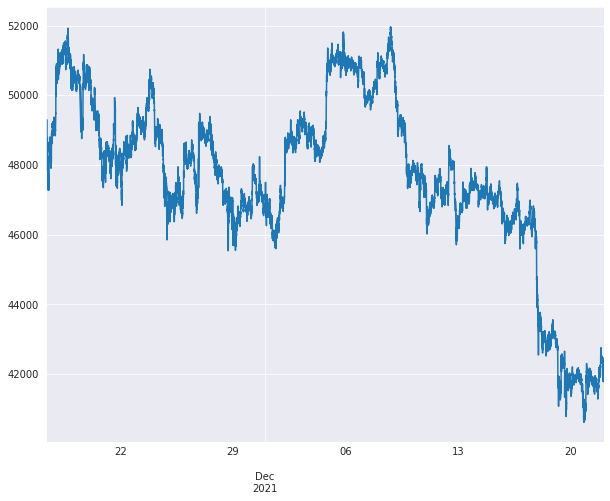

In [27]:
df_btc.iloc[-50000:].Close.plot(figsize=(10,8))

In [28]:
import tensorflow as tf
import numpy as np
import gc
import math as mt

seed = 28
np.random.seed(seed)


def Data_func(data, past, delay, minn, maxx = None, shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    batch_no = 1

    while True:

        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            rows = np.arange(i, min(i + batch_size, maxx))
        
        i+=len(rows)
        if i + batch_size > maxx: ## when you increase the past too much this statement gets executed at the first batch creation // add more data to overcome
            break
        
        samples = np.zeros((len(rows), past // rate, data.shape[-1]))
        targets = np.zeros((len(rows),))
        cbase_preds = np.zeros((len(rows),))
    
        for j, row in enumerate(rows):
            
            indices = range(rows[j] - past, rows[j], rate) ## take every point
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay - 1][-1]
       
        if batch_no == 1:
            print('im here')
            new_sample = samples
            new_targets = targets
            print('Ini_samples: ', samples.shape, 'Ini_targets: ', targets.shape)
        else:
            new_sample = np.concatenate([new_sample, samples], axis=0)
            new_targets = np.concatenate([new_targets, targets], axis=0)
        batch_no+=1
        
    return new_sample, new_targets

def Baseline_func(data, past, delay, minn, maxx = None , shuffle=False, batch_size=128, rate=6):
    if maxx is None:
        maxx = len(data) - delay -1
    i = minn + past
    batch_no = 1

    while True:

        if shuffle:
            rows = np.random.randint(minn + past, maxx, size = batch_size)
        else:
            rows = np.arange(i, min(i + batch_size, maxx))
        
        i+=len(rows)
        if i + batch_size > maxx:
            break
        
        cbase_preds = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            cbase_preds[j] = data[rows[j]][-1]
            
        if batch_no == 1:
            new_cbase_preds = cbase_preds
            print('Ini_cbase_pred: ', new_cbase_preds.shape)
        else:
            new_cbase_preds = np.concatenate([new_cbase_preds, cbase_preds], axis=0)
        batch_no+=1
        
    return new_cbase_preds



#'''    
x_train = df_btc.iloc[-50000:].copy() ## Localising training => prediction space

print()
x_train = x_train.to_numpy()

print('BTC_train: ',x_train.shape)

past = 360 ## ==>> looks !1 but 6hrs days back 

''' The problem statement involves being able to predict next 15 mins (very much possible!) residualized returns | NO DELAY '''
''' Target 15 datapoints from current point'''
delay = 0 ## Targeting after 15 mins | NOT correctt implementation 

train_split, test_split = 0.60, 0.25
train_max = round(train_split * x_train.shape[0])
val_max = (1-train_split)*x_train.shape[0]
test_max = round(test_split*val_max)
val_max = round(val_max - test_max)

''' use batch_size = 15 in accordance to the problem statement'''
bs = 15

mean = x_train[:train_max].mean(axis = 0)
x_train -= mean
std = x_train[:train_max].std(axis = 0)
x_train /= std

val_steps =  (train_max+val_max) - (train_max+1) - past ## (-past) because no target values for last  720 points
test_steps = (train_max+val_max+test_max)-(train_max+val_max+1) - past

print('Train_Max: ', mt.floor(train_max),', Val_Max: ', mt.floor(val_max),', Test_Max: ', mt.floor(test_max))
print()
#'''        
train_data = Data_func(x_train, past, delay, minn = 0, maxx = train_max - 1, batch_size=bs, shuffle=True, rate=5) ## sampling data every 5 minutes
cbase_train_data = Baseline_func(x_train, past, delay, minn = 0, maxx = train_max - 1, batch_size=bs, shuffle=True, rate=5) ## sampling data every 5 minutes

temp, _ = train_data
print('--'*20)
print('Done - Train_data: ', temp.shape)
print('Cbase_data: ', cbase_train_data.shape)
print('--'*20)
val_data = Data_func(x_train, past, delay, minn = train_max+1, maxx = train_max + val_max - 1, batch_size=bs, rate=5)
cbase_val_data = Baseline_func(x_train, past, delay, minn = train_max+1, maxx = train_max + val_max - 1, batch_size= bs, rate=5)

temp, _ = val_data 
print('--'*20)
print('Done - Val_data: ', temp.shape)
print('Cbase_data: ', cbase_val_data.shape)
print('--'*20)
#'''
test_data = Data_func(x_train, past, delay, minn = train_max+val_max+1, batch_size=bs, rate = 5)
cbase_test_data = Baseline_func(x_train, past, delay, minn = train_max+val_max+1, batch_size= bs, rate = 5)

temp, _ = test_data
print('--'*20)
print('Done - Test_data: ', temp.shape)
print('Cbase_data: ', cbase_test_data.shape)
print('--'*20)

train_sample, train_label = train_data ## sample contains return 
val_sample, val_label = val_data
test_sample, test_label = test_data

del temp
del train_data
del val_data
del test_data
gc.collect()


BTC_train:  (50000, 8)
Train_Max:  30000 , Val_Max:  15000 , Test_Max:  5000

im here
Ini_samples:  (15, 72, 8) Ini_targets:  (15,)
Ini_cbase_pred:  (15,)
----------------------------------------
Done - Train_data:  (29610, 72, 8)
Cbase_data:  (29610,)
----------------------------------------
im here
Ini_samples:  (15, 72, 8) Ini_targets:  (15,)
Ini_cbase_pred:  (15,)
----------------------------------------
Done - Val_data:  (14610, 72, 8)
Cbase_data:  (14610,)
----------------------------------------
im here
Ini_samples:  (15, 72, 8) Ini_targets:  (15,)
Ini_cbase_pred:  (15,)
----------------------------------------
Done - Test_data:  (4620, 72, 8)
Cbase_data:  (4620,)
----------------------------------------


42

In [29]:
import numpy as np
import tensorflow as tf
import gc

print('train_sample: ', train_sample.shape, 'train_label: ', train_label.shape)
tr_dataset = tf.data.Dataset.from_tensor_slices((train_sample, train_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE) ## use repeat() before batching while using TPU
val_dataset = tf.data.Dataset.from_tensor_slices((val_sample, val_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sample, test_label)).repeat().batch(bs) #.cache().prefetch(tf.data.AUTOTUNE)
del train_sample 
del train_label
gc.collect()

train_sample:  (29610, 72, 8) train_label:  (29610,)



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


0

In [30]:
### CommonSense Model
import numpy as np
from statsmodels.tools.eval_measures import meanabs, rmse

target_std = np.std(val_label)

'''always predicting the current return to be the 15 min later return '''

print('CommonSense - BaseLines - MAE -----')
print()
print('__Val__')
## using present info (latest info) as our prediction after 'delay' mins
print('MAE: ',meanabs(cbase_val_data, val_label))
print('RMSE: ', rmse(cbase_val_data, val_label))
print()
print('__Test__')
## using present info (latest info) as our prediction after 'delay' mins
print('MAE: ',meanabs(cbase_test_data, test_label))
print('RMSE: ', rmse(cbase_test_data, test_label))
print()

CommonSense - BaseLines - MAE -----

__Val__
MAE:  0.015124813750927288
RMSE:  0.023421821262397627

__Test__
MAE:  0.015829668914407666
RMSE:  0.025446708825511425



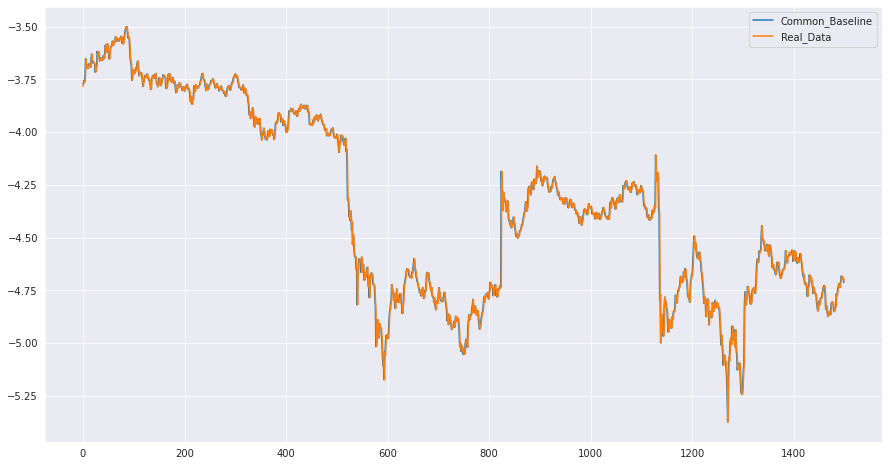

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

fig, axs = plt.subplots(1,1, figsize = (15,8))

axs.plot(np.arange(0,1500), cbase_test_data[:1500], label = 'Common_Baseline') 
axs.plot(np.arange(0,1500), test_label[:1500], label = 'Real_Data')
axs.legend()
plt.show()

### USE DNN and 1D_CNN + RNN

In [ ]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(72,8)),
    tf.keras.layers.Dense(128, activation = 'linear'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1)
    
])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
dnn_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
dnn_model.fit(tr_dataset, epochs=50, validation_data = val_dataset, validation_steps = val_steps, steps_per_epoch =128, callbacks=[es])
print('Training_Done ... ')

In [32]:
dnn_model = tf.keras.models.load_model('../input/all-models/dnn_model.h5')

In [33]:
print(dnn_model.evaluate(val_dataset, steps=128))
print(dnn_model.evaluate(test_dataset, steps=128))

2022-02-03 21:02:14.672224: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


128/128 [==============================] - 1s 4ms/step - loss: 0.1254 - mae: 0.2635
[0.12541578710079193, 0.26349037885665894]
128/128 [==============================] - 0s 4ms/step - loss: 0.2141 - mae: 0.3752
[0.21412210166454315, 0.375223308801651]


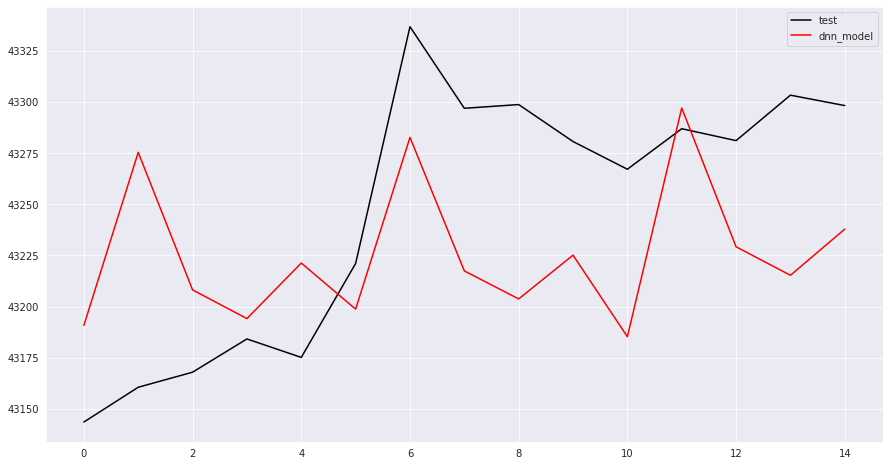

In [34]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(1)]
test_sample, test_target = test_pred_data[0] ## next 32 data-points | accounting for 32 mins prediction
x_lin = np.arange(0,test_target.shape[0]) 
def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

test_pred = dnn_model.predict(test_sample)
inv_test_pred = inv_norm(test_pred)
# test_pred_parent = inv_stdn(parent_model.predict(test_sample))
inv_test_target = inv_norm(test_target)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_test_target, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [35]:
from statsmodels.tools.eval_measures import meanabs

print('MAE: ', meanabs(inv_test_target, inv_test_pred))
print('Mean_target: ', np.mean(inv_test_target))
print('Mean_P_Error: ', (meanabs(inv_test_target, inv_test_pred) / np.mean(inv_test_target)) * 100, '%')

MAE:  57.20627366052504
Mean_target:  43246.8735532244
Mean_P_Error:  0.13227840294656365 %


In [ ]:
dnn_model.save('./dnn_model.h5')

In [ ]:
cnn_rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(72,8)),
    tf.keras.layers.Conv1D(128, 5),
    tf.keras.layers.Dense(264, activation='relu'),
    tf.keras.layers.GRU(264, return_sequences=True),
    tf.keras.layers.GRU(264),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
]) 

cnn_rnn_model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
cnn_rnn_model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=5)
cnn_rnn_model.fit(tr_dataset, epochs=20, validation_data = val_dataset, validation_steps = val_steps, steps_per_epoch =128, callbacks=[es])
print('Training_Done...')

In [36]:
cnn_rnn_model = tf.keras.models.load_model('../input/all-models/cnn_rnn_model.h5')

In [37]:
print(cnn_rnn_model.evaluate(val_dataset, steps=128))
print(cnn_rnn_model.evaluate(test_dataset, steps=128))

128/128 [==============================] - 12s 88ms/step - loss: 0.0059 - mae: 0.0564
[0.005889279302209616, 0.05640921741724014]
128/128 [==============================] - 12s 96ms/step - loss: 0.7422 - mae: 0.8187
[0.74224853515625, 0.8187247514724731]


In [ ]:
cnn_rnn_model.save('./cnn_rnn_model.h5')
print('saved cnn_rnn_model')

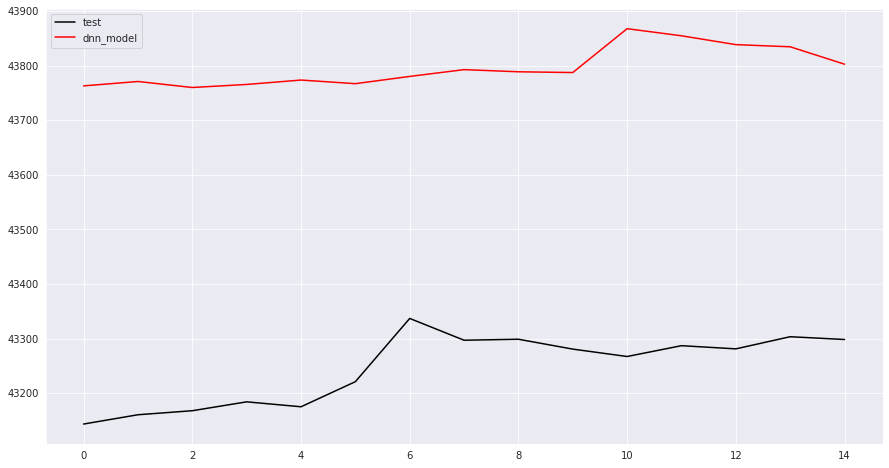

In [38]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(1)]
test_sample, test_target = test_pred_data[0] ##after validation set => next 32 datapoints | accounting for next 32 min prediction
x_lin = np.arange(0,test_target.shape[0]) 
def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

test_pred = cnn_rnn_model.predict(test_sample)
inv_test_pred = inv_norm(test_pred)
# test_pred_parent = inv_stdn(parent_model.predict(test_sample))
inv_test_target = inv_norm(test_target)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_test_target, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [39]:
print('MAE: $ ' + str(meanabs(inv_test_target, inv_test_pred)))
print('Mean_target: $ ' + str(np.mean(inv_test_target)))
print('Mean_P_Error: ', (meanabs(inv_test_target, inv_test_pred) / np.mean(inv_test_target)) * 100, '%')

MAE: $ 549.6360821922702
Mean_target: $ 43246.8735532244
Mean_P_Error:  1.2709267446023054 %


#### EXtended PREDiction | For DNN Model

In [40]:
test_pred_data = [(sample, target) for sample, target in test_dataset.take(3)]

test_list, target_list = test_pred_data[0]

for x_test, x_test_target in test_pred_data[1:]:
    test_list = tf.concat([test_list, x_test], axis=0)
    target_list = tf.concat([target_list, x_test_target], axis=0)



Prediction_Shape:  (45, 1) Target_Shape:  (45,)


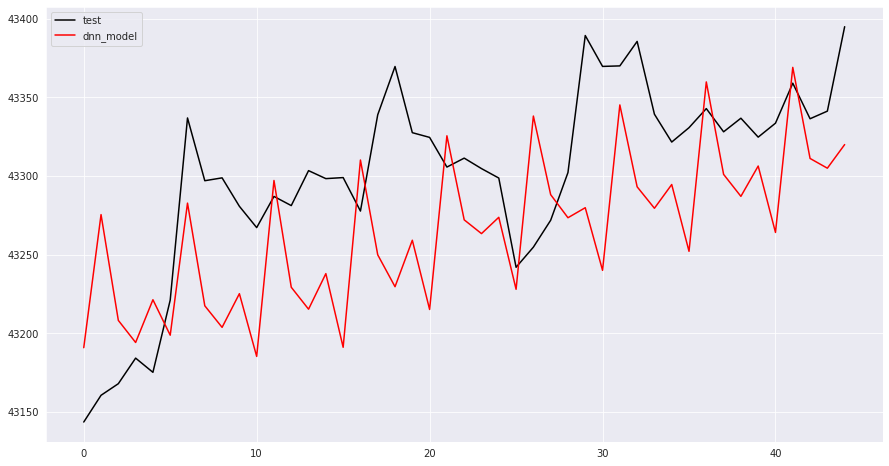

In [41]:
x_lin = np.arange(0,target_list.shape[0]) 
test_pred = dnn_model.predict(test_list)

print('Prediction_Shape: ', test_pred.shape,'Target_Shape: ',target_list.shape)

def inv_norm(test_target):
    test_target = np.ravel(test_target)
    test_target = test_target * std[-1]
    test_target = test_target + mean[-1]
    return test_target

inv_target_list = inv_norm(target_list)
inv_test_pred = inv_norm(test_pred)

fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, inv_target_list, 'k', label = 'test')
plt.plot(x_lin, inv_test_pred, 'r',  label = 'dnn_model')
# plt.plot(x_lin, test_pred_parent, 'g', label = 'parent_model')
plt.legend()
plt.show()

In [42]:
from statsmodels.tools.eval_measures import rmse

print('MAE: $ ' + str(meanabs(inv_target_list, inv_test_pred)))
print('Mean_target: $ ' + str(np.mean(inv_target_list)))
print('Mean_P_Error: ', (meanabs(inv_target_list, inv_test_pred) / np.mean(inv_target_list)) * 100, '%')

print('RMSE: $ ' + str(rmse(inv_target_list, inv_test_pred)))

MAE: $ 56.089590951937616
Mean_target: $ 43300.818892999225
Mean_P_Error:  0.12953471178118076 %
RMSE: $ 66.07518266197285


SESSION STOPPER

In [ ]:
import time
for i in range(50):
    print('Time: ', i)
    time.sleep(30*60)

Well thats it for now... next we will use Some advanced Sequential models & some financial models for gaining insights + forecasting  

In [ ]:
'''import gresearch_crypto as gs
env = gs.make_env()
iter_test = env.iter_test()
for (test_df, _) in iter_test:
    sample_prediction_df['Target'] = 0  
    env.predict(sample_prediction_df)'''